In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same
dataset. See if you can get them to produce roughly the same model.


#### load dataset

In [27]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]].values
y = iris.target

In [37]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

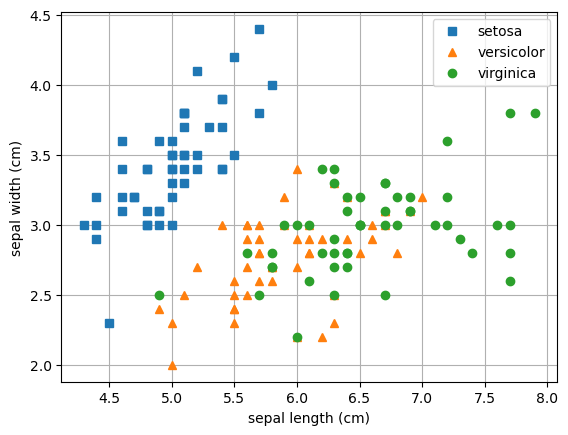

In [43]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s", label="setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", label="versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o", label="virginica")
plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()

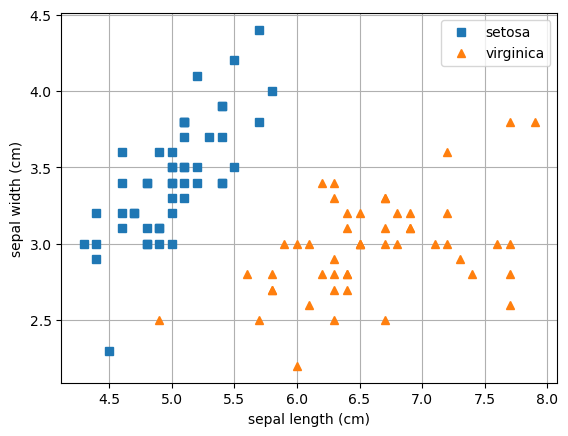

In [63]:
# iris versicolor sepal are not linearly separable from iris virginica sepal so we will use setosa and virginica

X = X[y != 1]
y = y[y != 1]

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s", label="setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "^", label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()

In [65]:
svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC()
)

svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [82]:
axes = [X[:, 0].min()-1, X[:, 0].max()+1, X[:, 1].min()-1, X[:, 1].max()+1]
As = np.linspace(axes[0], axes[1], 200)
Bs = np.linspace(axes[2], axes[3], 200)
A, B = np.meshgrid(As, Bs)
Z = np.c_[A.ravel(), B.ravel()]

pred = svm_clf.predict(Z).reshape(A.shape)

In [83]:
axes

[3.3, 8.9, 1.2000000000000002, 5.4]

(4.0, 8.0, 2.0, 4.5)

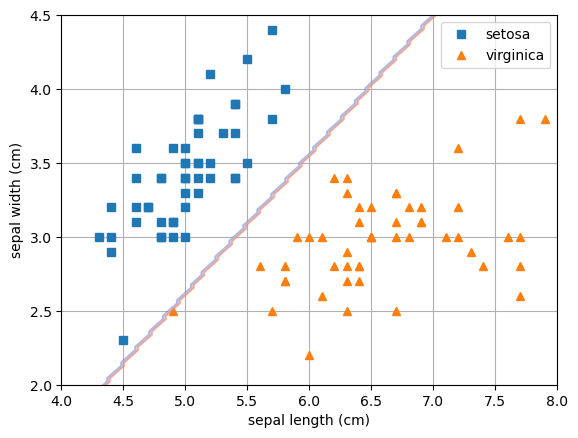

In [88]:

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s", label="setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "^", label="virginica")
plt.contour(A, B, pred, alpha=0.3, cmap='coolwarm')
plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()
plt.axis([4, 8, 2, 4.5])

In [94]:
model2 = make_pipeline(
    StandardScaler(),
    SVC(degree=1)
)

model2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(degree=1))])

(4.0, 8.0, 2.0, 4.5)

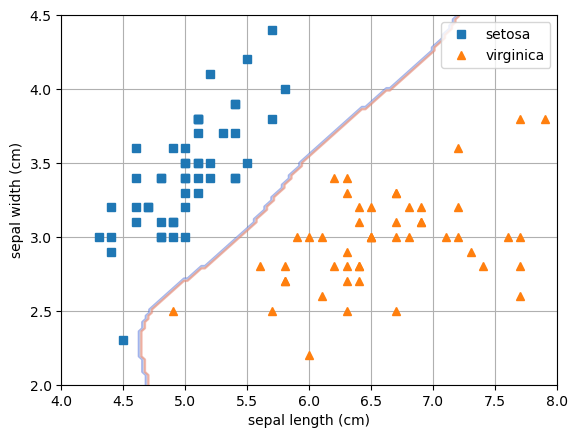

In [95]:
pred = model2.predict(Z).reshape(A.shape)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s", label="setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "^", label="virginica")
plt.contour(A, B, pred, alpha=0.3, cmap='coolwarm')
plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()
plt.axis([4, 8, 2, 4.5])


In [99]:
model3 = make_pipeline(
    StandardScaler(),
    SGDClassifier()
)

model3.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

(4.0, 8.0, 2.0, 4.5)

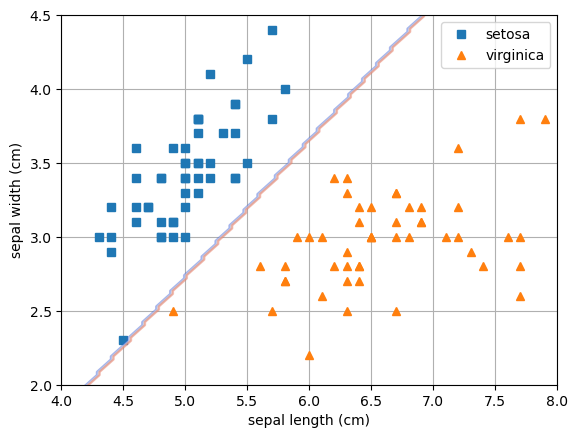

In [100]:
pred = model3.predict(Z).reshape(A.shape)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s", label="setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "^", label="virginica")
plt.contour(A, B, pred, alpha=0.3, cmap='coolwarm')
plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()
plt.axis([4, 8, 2, 4.5])